#### Importimi i Librarive të Nevojshme

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importimi i Dataset-it nga File CSV

In [8]:
df = pd.read_csv("C:\\Users\\online\\OneDrive\\Desktop\\Semestri 5\\Sistemet e procesimit të të dhënave Dizajnuese\\Analiza e Të Dhënave të Shëndetit\\healthcareDS.csv")

#### Shfaqja e Rreshtave të Parë të Dataset-it për të pasur një pamje të përgjithshme të tij

In [11]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#### Informata rreth Dataset-it

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

#### Pastrimi i të Dhënave dhe Parapërgatitja

Në këtë hap, ne ndajmë kolonën **Blood Pressure** në dy kolona të reja: **Systolic BP** dhe **Diastolic BP**. Kjo është e nevojshme sepse kolona **Blood Pressure** përmban të dhëna të shkruara në formën e një vlerë të përbërë (p.sh. "120/80"), që nuk mund të lexohen si vlera numerike për analiza të mëtejshme. 

- **Systolic BP** është numri më i madh, që tregon presionin kur zemra rreh.
- **Diastolic BP** është numri më i vogël, që tregon presionin kur zemra relaksohet.




In [18]:
df[['Systolic BP','Diastolic BP']]=df['Blood Pressure'].str.split('/',expand=True).astype(float)

Heqim disa kolona që nuk janë të nevojshme për analizë

In [21]:
df.drop(columns=['Patient ID','Family History','Country','Continent','Hemisphere','Blood Pressure'],inplace=True)

Kontrollojmë nëse ka vlera null në dataset


In [24]:
df.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
Systolic BP                        0
Diastolic BP                       0
dtype: int64

In [25]:
df['Age'].describe()

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

Kontrollojmë vlerat për tu siguruar që ka vetëm "Male" dhe "Female" 

In [29]:
df['Sex'].value_counts()

Sex
Male      6111
Female    2652
Name: count, dtype: int64

Kontrollojmë vlerat e mundshme të kolonës **Diet** për të siguruar që ka vetëm vlera të sakta


In [32]:
df['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

Krijojmë funksionin **kategorizimi_BMI** për të kategorizuar individët sipas BMI-së në katër grupe: **Underweight**, **Normal**, **Overweight**, dhe **Obese**

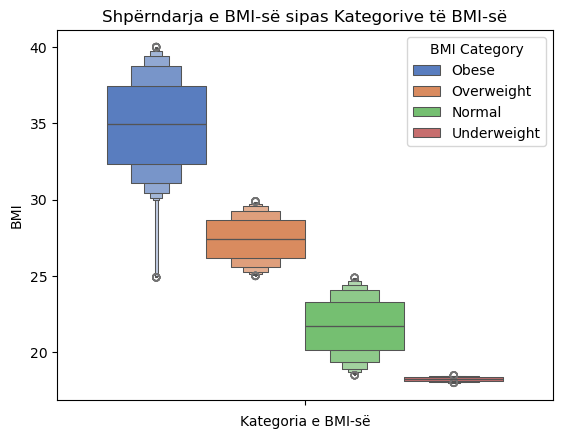

In [35]:
def kategorizimi_BMI(row):
    if row['BMI'] < 18.5:
        return 'Underweight'
    elif 18.5 <= row['BMI'] < 24.9:
        return 'Normal'
    elif 25 <= row['BMI'] < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI Category'] = df.apply(kategorizimi_BMI, axis=1)

sns.boxenplot(data=df, hue='BMI Category', y='BMI', palette='muted')
plt.title('Shpërndarja e BMI-së sipas Kategorive të BMI-së')
plt.xlabel('Kategoria e BMI-së')
plt.ylabel('BMI')
plt.show()

Krijojmë funksionin **kategorizimi_BP** për të kategorizuar individët sipas vlerave të tensionit të gjakut (**Systolic BP** dhe **Diastolic BP**) në pesë kategori: **Normal**, **Elevated**, **Hypertension Stage 1**, **Hypertension Stage 2**, dhe **Hypertensive Crisis**


In [37]:
def kategorizimi_BP(row):
    if row['Systolic BP'] < 120 and row['Diastolic BP'] < 80:
        return 'Normal'
    elif 120 <= row['Systolic BP'] <= 129 and row['Diastolic BP'] < 80:
        return 'Elevated'
    elif 130 <= row['Systolic BP'] <= 139 or 80 <= row['Diastolic BP'] <= 89:
        return 'Hypertension Stage 1'
    elif 140 <= row['Systolic BP'] or 90 <= row['Diastolic BP']:
        return 'Hypertension Stage 2'
    else:
        return 'Hypertensive Crisis'

df['BP Category'] = df.apply(kategorizimi_BP, axis=1)


### **VIZUALIZIMET E TË DHËNAVE**

Ky vizualizim paraqet disa statistika që tregojnë shpërndarjen e numrit të meshkujve dhe femrave në grupe të ndryshme moshe, sipas kategorive të tensionit të gjakut: **Normal**, **Elevated**, **Hypertension Stage 1**, dhe **Hypertension Stage 2**.



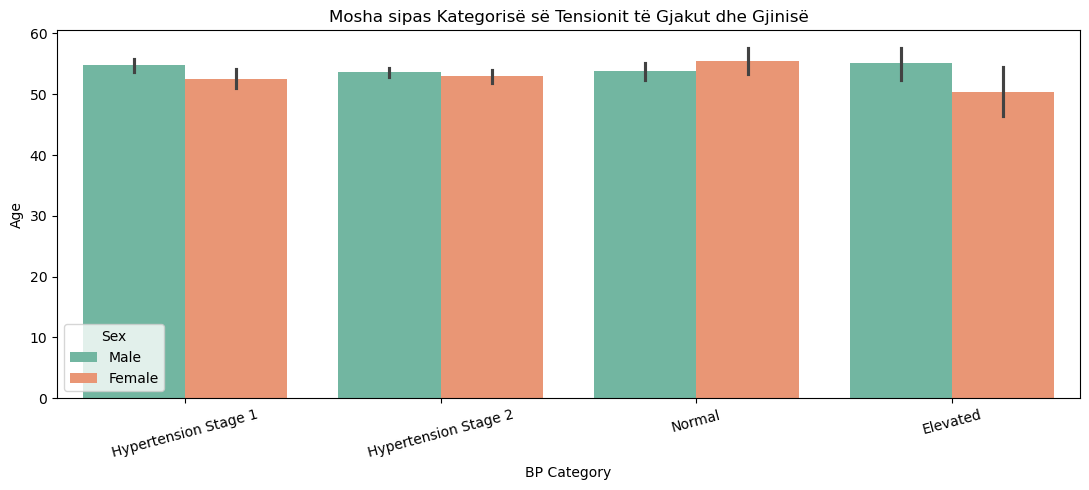

In [41]:
plt.figure(figsize=(11, 5))
sns.barplot(data=df, x='BP Category', y='Age', hue='Sex', palette='Set2')
plt.title('Mosha sipas Kategorisë së Tensionit të Gjakut dhe Gjinisë')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

 **Përqindja e Rrezikut të Sulmit në Zemër për Përdoruesit dhe Jo-Përdoruesit e Duhanit**

Në këtë vizualizim, shfaqen dy grafe në formë pie chart që tregojnë shpërndarjen e rrezikut për sulm në zemër, duke e ndarë këtë informacion për përdoruesit dhe jo-përdoruesit e duhanit.
Kjo tregon si ndikon përdorimi i duhanit në rrezikun për sulm në zemër.


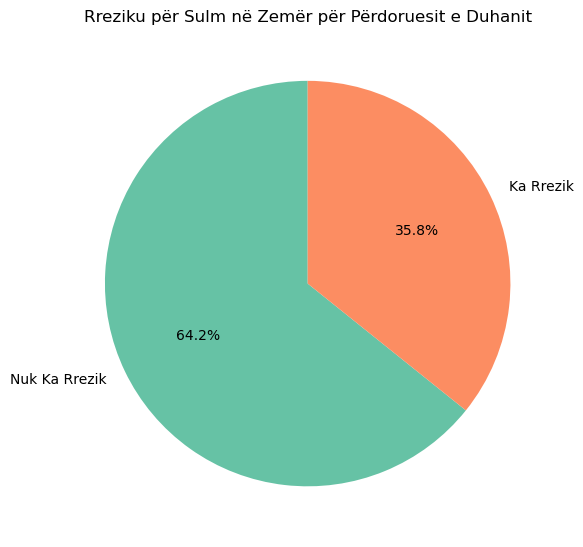

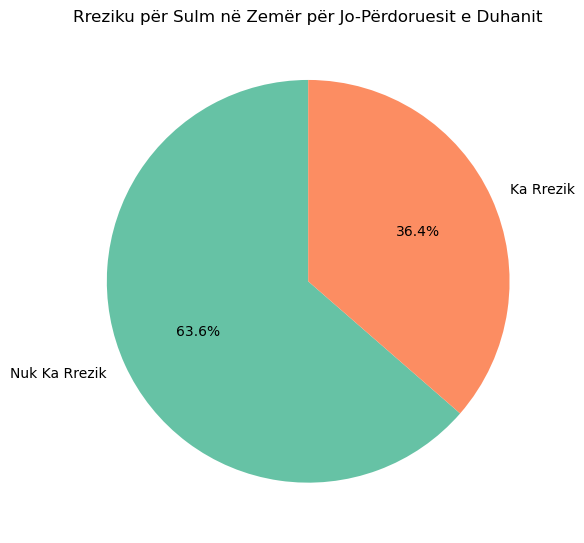

In [50]:
smoking_plot_data = smoking_pivot_percentage.loc[1].copy()
non_smoking_plot_data = smoking_pivot_percentage.loc[0].copy()


labels_map = {0: 'Nuk Ka Rrezik', 1: 'Ka Rrezik'}
smoking_plot_data.index = smoking_plot_data.index.map(labels_map)
non_smoking_plot_data.index = non_smoking_plot_data.index.map(labels_map)


colors = ['#66c2a5', '#fc8d62']


plt.figure(figsize=(6, 6))
smoking_plot_data.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Rreziku për Sulm në Zemër për Përdoruesit e Duhanit')
plt.ylabel('')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 6))
non_smoking_plot_data.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Rreziku për Sulm në Zemër për Jo-Përdoruesit e Duhanit')
plt.ylabel('')
plt.tight_layout()
plt.show()




**Vizualizimi i Rrezikut për Sulm në Zemër sipas Gjinive**

Ky grafik paraqet shpërndarjen e riskut për sulm në zemër (i lartë, i mesëm, i ulët) dhe ndarjen e tij në varësi të gjinisë (meshkuj dhe femra).


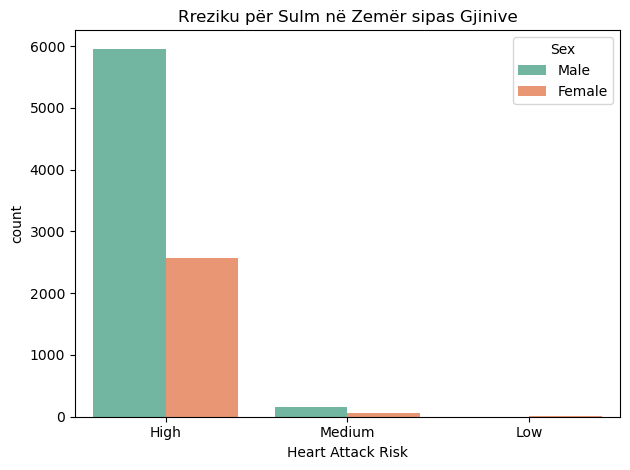

In [52]:
def heart_attack_risk(row):
    if row['Cholesterol'] > 240 or row['BP Category'] in ['Hypertension Stage 1', 'Hypertension Stage 2'] or row['Diabetes'] == 1:
        return 'High'
    elif row['Cholesterol'] > 200 or row['Smoking'] == 1 or row['Obesity'] == 1:
        return 'Medium'
    else:
        return 'Low'

df['Heart Attack Risk'] = df.apply(heart_attack_risk, axis=1)

sns.countplot(x='Heart Attack Risk', hue='Sex', data=df, palette='Set2')
plt.title('Rreziku për Sulm në Zemër sipas Gjinive')
plt.tight_layout()
plt.show()

**Vizualizimi i Përqindjes së Sulmit në Zemër sipas Grupmoshave**

Ky grafik tregoni përqindjen e individëve me risk të ndryshëm për sulm në zemër (i lartë, i mesëm, i ulët) në grupe moshe të ndryshme. Përqindjet janë bazuar në ndarjen e individëve në grupe moshe dhe llogaritjen e shpërndarjes së riskut për secilin grup.


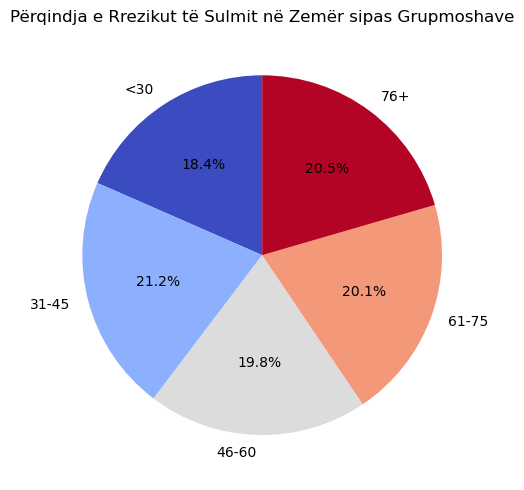

In [55]:
bins = [0, 30, 45, 60, 75, 100]
labels = ['<30', '31-45', '46-60', '61-75', '76+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

pivot_table = df.pivot_table(index='Age Group', columns='Heart Attack Risk', aggfunc='size', fill_value=0, observed=False)

total_count = pivot_table.sum().sum()
pivot_table_percentage = pivot_table.sum(axis=1) / total_count * 100

plt.figure(figsize=(7,5))
pivot_table_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Përqindja e Rrezikut të Sulmit në Zemër sipas Grupmoshave')
plt.ylabel('')
plt.tight_layout()
plt.show()



**Vizualizimi i Rrezikut për Sulm në Zemër sipas Obezitetit dhe Diabetit**

Ky grafik tregon shpërndarjen e riskut për sulm në zemër (i lartë, i mesëm, i ulët) në lidhje me obezitet dhe diabet

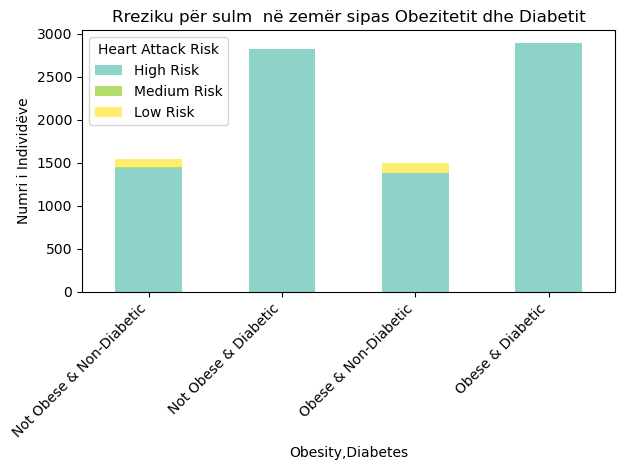

In [58]:
df_grouped = df.groupby(['Obesity', 'Diabetes', 'Heart Attack Risk']).size().unstack().fillna(0)

ax = df_grouped.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Rreziku për sulm  në zemër sipas Obezitetit dhe Diabetit')
plt.ylabel('Numri i Individëve')

x_labels = [
    f'{"Obese" if x[0] == 1 else "Not Obese"} & {"Diabetic" if x[1] == 1 else "Non-Diabetic"}' 
    for x in df_grouped.index
]
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend(['High Risk', 'Medium Risk', 'Low Risk'], title='Heart Attack Risk')
plt.tight_layout()
plt.show()
